In [1]:
# to interact  with plot
%matplotlib widget

import mesa
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

from model import Schelling

ValueError: The dimension of bins must be equal to the dimension of the sample x.

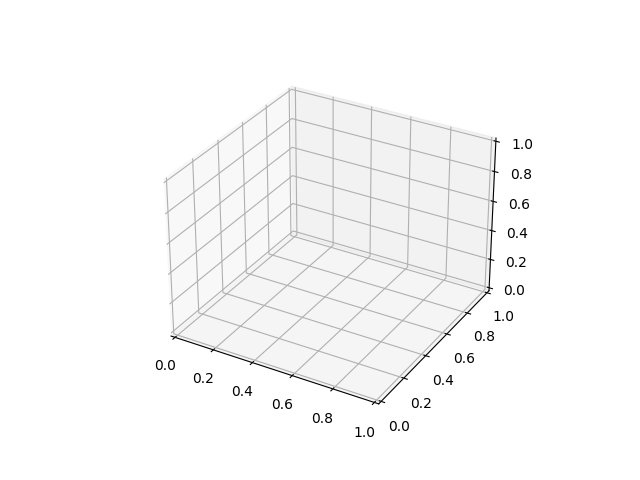

In [3]:
def extract_data(model):
    """
    Extracts the data from the model and returns it as a DataFrame.
    """

    # Extract data from model
    x_coords = np.array([agent.pos[0] for agent in model.schedule.agents])  # Agent x coords
    y_coords = np.array([agent.pos[1] for agent in model.schedule.agents])  # Agent y coords
    wealths = np.array([agent.wealth for agent in model.schedule.agents])   # Agent wealths 
    types = np.array([agent.type for agent in model.schedule.agents])       # Agent types
    return x_coords, y_coords, wealths, types


def plot2D_model(model):
    """
    Plots a 2D density heatmap of the model.
        x-axis: x position
        y-axis: y position
        z-axis: wealth
    """

    # Extract data from model
    x_coords, y_coords, wealths, types = extract_data(model)
    df = pd.DataFrame({'x_pos': x_coords, 'y_pos': y_coords, 'wealth': wealths, 'type': types})

    # Create the 2D density heatmap
    fig = px.density_heatmap(df, x='x_pos', y='y_pos', z='wealth', nbinsx=model.width, nbinsy=model.height)

    # Set axis labels
    fig.update_layout(xaxis_title='X', yaxis_title='Y', coloraxis_colorbar_title='Wealth')

    # Show the plot
    fig.show()


def plot3D_model(model):
    """
    
    """
    # Extract data
    x_coords, y_coords, wealths, types = extract_data(model)


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    hist, x_edges, y_edges = np.histogram2d(x_coords, y_coords, bins=(model.width, model.height), weights=wealths)

    # Get the coordinates of the edges for the plotting
    x_pos, y_pos = np.meshgrid(x_edges[:-1], y_edges[:-1], indexing='ij')
    x_pos = x_pos.ravel()
    y_pos = y_pos.ravel()
    z_pos = np.zeros_like(x_pos)

    # Get the heights for the bars and normalize
    dx = dy = 1  # Width and depth of the bars
    dz = hist.ravel()
    dz = dz / dz.max()

    # Map agent types to colors
    type_colors = {0: 'red', 1: 'green', 2: 'blue'}
    bar_colors = [type_colors[t] for t in types]
    print(np.unique(z_pos))
    print(len(bar_colors), len(types))

    # Create the 3D bars
    ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz)

    # Set the plot limits
    ax.set_xlim(0, model.width)
    ax.set_ylim(0, model.height)
    ax.set_zlim(0, 1)  # Normalize the wealth values to [0, 1] for the z-axis

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Wealth')

    plt.show()

# Define model parameters
heigth, width = 100, 100
density = 0.97
fixed_areas_pc = 0.0
popilation_sizes = [0.8, 0.2]
homophily = 3
cluster_threshold = 4

# Create the model
model = Schelling(heigth, width, density, fixed_areas_pc, popilation_sizes, homophily, cluster_threshold)

for i in range(3):
    model.step()
    plot2D_model(model)

plot3D_model(model)



In [ ]:
def plot2D_v2_model(model):
    x_coords, y_coords, wealths, types = extract_data(model)

    fig = go.Figure()

    type_markers = ['x', 'circle', 'square', 'diamond', 'triangle-up', 'triangle-down']  # Define marker shapes
    type_colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink']  # Define marker colors

    for t in set(types):
        mask = types == t
        x = x_coords[mask]
        y = y_coords[mask]

        fig.add_trace(go.Scatter(
            x=x,
            y=y,
            mode='markers',
            showlegend=False,
            marker=dict(
                symbol=type_markers[t],
                opacity=0.7,
                color=type_colors[t],
                size=8,
                line=dict(width=1),
            )
        ))

    fig.add_trace(go.Histogram2d(
        x=x_coords,
        y=y_coords,
        colorscale='YlGnBu',
        zmax=10,
        nbinsx=14,
        nbinsy=14,
        zauto=False,
        # Add weights
        z=wealths,
        histfunc='sum',
        opacity=0.7,
    ))

    fig.update_layout(
        xaxis=dict(ticks='', showgrid=False, zeroline=False, nticks=20),
        yaxis=dict(ticks='', showgrid=False, zeroline=False, nticks=20),
        autosize=False,
        height=550,
        width=550,
        hovermode='closest',
    )

    fig.show()

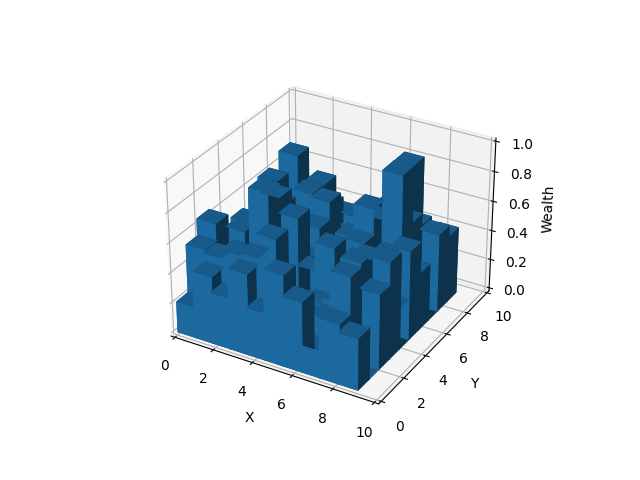

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



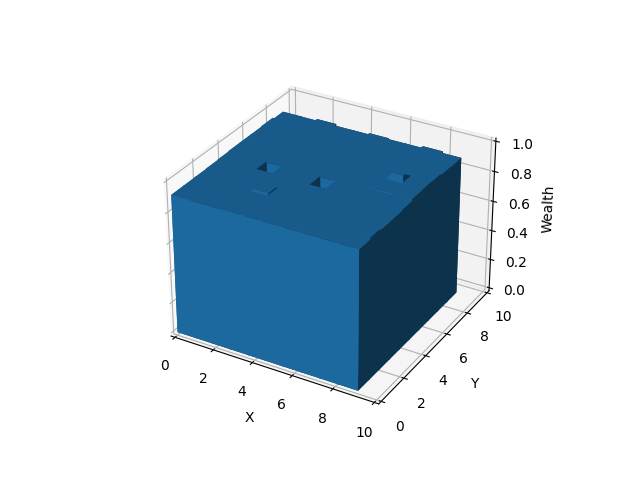

In [82]:
def plot3D_model(model):
    """
    Plots a 3D bar chart of the model.
        x-axis: x position
        y-axis: y position
        z-axis: wealth
        color: agent type

    Utility: Nice to track the distribution of wealth over time.
             Agent types are mapped to colors.
    """

    # Extract data
    x_coords, y_coords, wealths, types = extract_data(model)

    # Create the 3D bar chart
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create the histogram
    hist, x_edges, y_edges = np.histogram2d(x_coords, y_coords, bins=(model.width, model.height), weights=wealths)

    # Get the coordinates of the edges for the plotting
    x_pos, y_pos = np.meshgrid(x_edges[:-1], y_edges[:-1], indexing='ij')
    x_pos = x_pos.ravel()
    y_pos = y_pos.ravel()
    z_pos = np.zeros_like(x_pos)

    # Get the heights for the bars and normalize
    dx = dy = 1  # Width and depth of the bars
    dz = hist.ravel()
    dz = dz / dz.max()

    # # Map agent types to colors
    # type_colors = {0: 'red', 1: 'green', 2: 'blue'}
    # bar_colors = [type_colors[t] for t in types]
    # print(np.unique(z_pos))
    # print(len(bar_colors), len(types))

    # Create the 3D bars
    ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz)

    # Set the plot limits
    ax.set_xlim(0, model.width)
    ax.set_ylim(0, model.height)
    ax.set_zlim(0, 1)  # Normalize the wealth values to [0, 1] for the z-axis

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Wealth')

    plt.show()

# Define model parameters
heigth, width = 10, 10
density = 0.97
fixed_areas_pc = 0.0
popilation_sizes = [0.8, 0.2]
homophily = 3
cluster_threshold = 4

# Create the model
model = Schelling(heigth, width, density, fixed_areas_pc, popilation_sizes, homophily, cluster_threshold)

plot3D_model(model)
for i in range(100):
    model.step()
plot3D_model(model)

In [80]:
def extract_data(model):
    """
    Extracts the data from the model and returns it as a DataFrame.
    """

    # Extract data from model
    x_coords = np.array([agent.pos[0] for agent in model.schedule.agents])  # Agent x coords
    y_coords = np.array([agent.pos[1] for agent in model.schedule.agents])  # Agent y coords
    wealths = np.array([agent.wealth for agent in model.schedule.agents])   # Agent wealths 
    types = np.array([agent.type for agent in model.schedule.agents])       # Agent types
    return x_coords, y_coords, wealths, types

def plot_model(model):
    x_coords, y_coords, wealths, types = extract_data(model)

    fig = go.Figure()

    type_markers = ['x', 'circle', 'square', 'diamond', 'triangle-up', 'triangle-down']  # Define marker shapes
    type_colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink']  # Define marker colors

    for t in set(types):
        mask = types == t
        x = x_coords[mask]
        y = y_coords[mask]

        fig.add_trace(go.Scatter(
            x=x,
            y=y,
            mode='markers',
            showlegend=False,
            marker=dict(
                symbol=type_markers[t],
                opacity=0.7,
                color=type_colors[t],
                size=8,
                line=dict(width=1),
            )
        ))

    fig.add_trace(go.Histogram2d(
        x=x_coords,
        y=y_coords,
        colorscale='YlGnBu',
        zmax=10,
        nbinsx=14,
        nbinsy=14,
        zauto=False,
        # Add weights
        z=wealths,
        histfunc='sum',
        opacity=0.7,
    ))

    fig.update_layout(
        xaxis=dict(ticks='', showgrid=False, zeroline=False, nticks=20),
        yaxis=dict(ticks='', showgrid=False, zeroline=False, nticks=20),
        autosize=False,
        height=550,
        width=550,
        hovermode='closest',
    )

    fig.show()

# Define model parameters
heigth, width = 10, 10
density = 0.97
fixed_areas_pc = 0.0
popilation_sizes = [0.8, 0.2]
homophily = 3
cluster_threshold = 4

# Create the model
model = Schelling(heigth, width, density, fixed_areas_pc, popilation_sizes, homophily, cluster_threshold)

for i in range(4):
    model.step()
    plot_model(model)